In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()

datasets = mnist_bldr.as_dataset(as_supervised=False)

print(datasets.keys())

mnist_train_orig, mnist_test_orig = datasets["train"], datasets["test"]

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0,
                  tf.cast(item['label'], tf.int32))
)
mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0,
                  tf.cast(item['label'], tf.int32)))

mnist_train = mnist_train.shuffle(buffer_size = BUFFER_SIZE, reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [3]:
next(iter(mnist_train))

(<tf.Tensor: shape=(64, 28, 28, 1), dtype=float32, numpy=
 array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', data_format='channels_last',name='conv_1',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', name='conv_2',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_2'))

In [5]:
model.compute_output_shape(input_shape=(16,28,28,1))

(16, 7, 7, 64)

In [6]:
model.add(tf.keras.layers.Flatten())

model.compute_output_shape(input_shape=(16,28,28,1))

(16, 3136)

In [7]:
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

In [8]:
tf.random.set_seed(1)
model.build(input_shape=(None,28,28,1))

model.compute_output_shape(input_shape=(16,28,28,1))

(16, 10)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_1 (MaxPooling2D)                │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_2 (MaxPooling2D)                │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(mnist_train, epochs=NUM_EPOCHS, validation_data=mnist_valid, shuffle=True)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.8990 - loss: 0.3119 - val_accuracy: 0.9863 - val_loss: 0.0460
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9834 - loss: 0.0529 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9905 - val_loss: 0.0321
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9897 - val_loss: 0.0382
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9926 - loss: 0.0204 - val_accuracy: 0.9895 - val_loss: 0.0360
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9902 - val_loss: 0.0392
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9900 - val_loss: 0.0442
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9953 - loss: 0.0143 - val_a

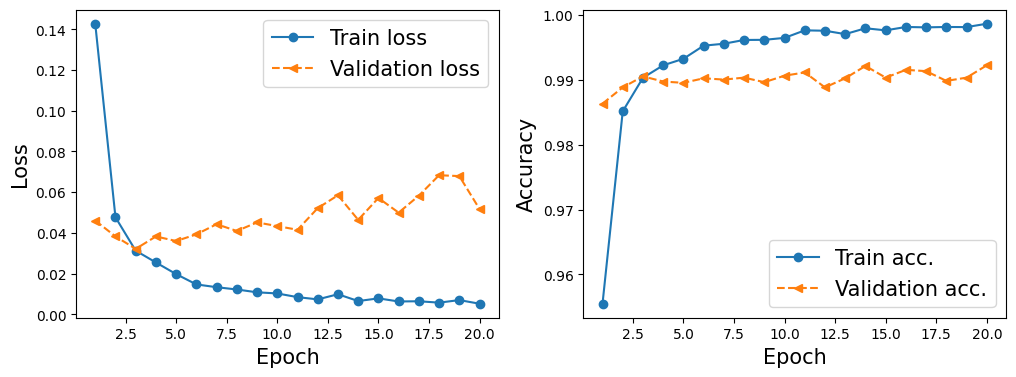

In [11]:
# week7_1.txt
import matplotlib.pyplot as plt
import numpy as np

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [12]:
test_result = model.evaluate(mnist_test.batch(20))
print('\n테스트 정확도 {:.2f}%'.format(test_result[1]*100))

500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9935 - loss: 0.0240

테스트 정확도 99.30%


In [13]:
batch_test = next(iter(mnist_test.batch(12)))
preds = model.predict(batch_test[0])
tf.print(preds.shape)

preds = tf.argmax(preds, axis=1)
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
(12, 10)
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


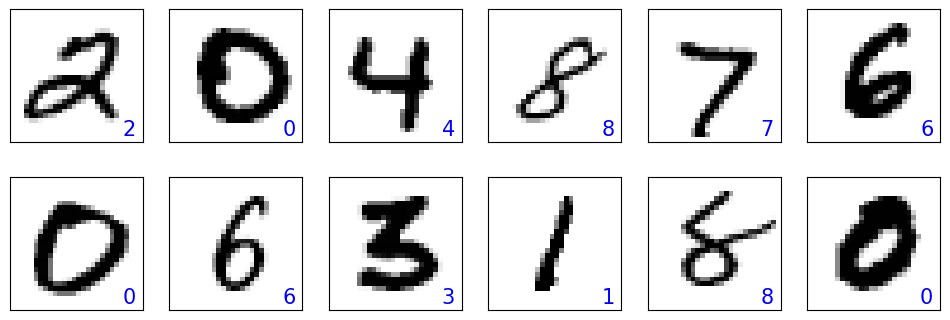

In [14]:
#week7_2.txt

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()